<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Проверка-дубликатов" data-toc-modified-id="Проверка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверка дубликатов</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-площади,-цены,-числа-комнат,-высоты-потолков" data-toc-modified-id="Исследование-площади,-цены,-числа-комнат,-высоты-потолков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Исследование площади, цены, числа комнат, высоты потолков</a></span></li><li><span><a href="#Исследование-количества-времени-для-продажи-квартиры" data-toc-modified-id="Исследование-количества-времени-для-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Исследование количества времени для продажи квартиры</a></span></li><li><span><a href="#Анализ-редких-и-выбивающихся-значений" data-toc-modified-id="Анализ-редких-и-выбивающихся-значений-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Анализ редких и выбивающихся значений</a></span></li><li><span><a href="#Исследование-факторов,-влияющих-на-стоимость-квартиры" data-toc-modified-id="Исследование-факторов,-влияющих-на-стоимость-квартиры-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Исследование факторов, влияющих на стоимость квартиры</a></span></li><li><span><a href="#Анализ-десяти-населённых-пунктов-с-наибольшим-числом-объявлений" data-toc-modified-id="Анализ-десяти-населённых-пунктов-с-наибольшим-числом-объявлений-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ десяти населённых пунктов с наибольшим числом объявлений</a></span></li><li><span><a href="#Анализ-изменения-цены-по-степени-удалённости-от-центра" data-toc-modified-id="Анализ-изменения-цены-по-степени-удалённости-от-центра-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Анализ изменения цены по степени удалённости от центра</a></span></li><li><span><a href="#Сравнение-выводов-по-квартирам-в-центре-и-общих-выводов-по-всему-городу" data-toc-modified-id="Сравнение-выводов-по-квартирам-в-центре-и-общих-выводов-по-всему-городу-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Сравнение выводов по квартирам в центре и общих выводов по всему городу</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

**Описание проекта:**

В распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Задача — установить параметры для определения рыночной стоимости объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Изучение данных из файла

Импортируем библиотеку `pandas`. Cохраним файл `real_estate_data.csv` из папки `/datasets` в переменную `data`. В качестве разделителя таблицы используется `\t`, нужно передать это значение в параметр `sep`.

Выведем первые 5 строк таблицы.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Получим общую информацию о таблице:

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Приведем название столбца `cityCenters_nearest` к стилю Snake case и выведем список столбцов.

In [3]:
data = data.rename({'cityCenters_nearest': 'city_centers_nearest'}, axis='columns')
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**Вывод**

Данные в таблице разделены символом `\t`. В таблице 23699 строк и 22 столбца, в некоторых столбцах встречаются пропуски.

Типы данных: bool, float, int и object.

Описание данных:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `city_centers_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

## Предобработка данных

### Обработка пропусков

Посмотрим на количество пропусков в таблице:

In [4]:
data_isna = pd.DataFrame()
# cтолбец суммы
data_isna['sum'] = data.isna().sum() 
# cтолбец процента от общего
data_isna['percent'] = (data.isna().mean()*100).round(1).astype(str).add('%')
data_isna

,sum,percent
total_images,0,0.0%
last_price,0,0.0%
total_area,0,0.0%
first_day_exposition,0,0.0%
rooms,0,0.0%
ceiling_height,9195,38.8%
floors_total,86,0.4%
living_area,1903,8.0%
floor,0,0.0%
is_apartment,20924,88.3%


В столбцах `floors_total` и `locality_name` очень мало пропущенных значений, 49 и 86 от 23699 строк составляет меньше 0,4%. Удалим строки с отсутствующими значениями в этих столбцах, они не повлияют на результаты исследования.

In [5]:
data.dropna(subset = ['floors_total', 'locality_name'], inplace = True)

Пропуски в `ceiling_height` (высота потолков) заменим на медианное значение этого столбца.

In [6]:
print('Медиана высоты потолков:', data['ceiling_height'].median())
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Медиана высоты потолков: 2.65


Если квартира является студией, то площадь кухни `kitchen_area` приравняем к нулю, а жилую площадь `living_area` сделаем равной общей площади `total_area`.

In [7]:
# площадь кухни в студии приравниваем к 0
data.loc[(data['kitchen_area'].isna()) & (data['studio'] == True),'kitchen_area'] = 0
# жилую площадь в студии приравниваем к общей площади
data.loc[(data['kitchen_area'].isna()) & (data['studio'] == True),'living_area'] = data['total_area']

Пропуски в `living_area` и `kitchen_area`заменим на медианное значение группы по количеству комнат `rooms` с помощью метода `apply()`.

In [8]:
columns = ['living_area', 'kitchen_area']
for column in columns:
    # лямбда-функция для вычисленя медианы
    data[column] = data.groupby('rooms')[column].apply(lambda x: x.fillna(x.median()))

Колонка `is_apartment` имеет булев тип данных. Скорее всего отсутвующие значения означают, что это не апартаменты, заменим пустые значения на `False`.

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Отсутвие значений в колоке `balcony` заменим на 0.

In [10]:
data['balcony'] = data['balcony'].fillna(0)

Посмотрим на парки и озера.

Проверим ситуации, когда отсутвует значение в `parks_nearest` (расстояние до ближайшего парка в м), а в `parks_around3000` (число парков в радиусе 3 км) значение больше 0. И аналогично с озерами: `ponds_nearest` и `ponds_around3000`.

Также проверим случаи обратные: в `parks_around3000` нет значения, а в `parks_nearest` значение меньше 3000. И аналогичным образом с озерами.

In [11]:
print(len(data.query('parks_nearest.isna() and parks_around3000 > 0')),
      len(data.query('ponds_nearest.isna() and ponds_around3000 > 0')),
      len(data.query('parks_nearest < 3000 and parks_around3000.isna()')),
      len(data.query('ponds_nearest < 3000 and ponds_around3000.isna()'))
     )

0 0 0 0


Строк удовлетворяющих таким условиям нет. Предположения оказались неверными.

Тогда пропуски в параметрах `parks_around3000` и `ponds_around3000` (количество парков и озер в радиуссе 3км) можно заменить на 0.

In [12]:
data[['parks_around3000', 'ponds_around3000']] = data[['parks_around3000', 'ponds_around3000']].fillna(0)

Пустые значения в столбцах с дистанцией `parks_nearest`, `ponds_nearest`, `airports_nearest` и `city_centers_nearest` заменим на медианные по всему набору данных, так как они не будут искажать результаты исследования.

In [13]:
columns = ['parks_nearest', 'ponds_nearest', 'airports_nearest', 'city_centers_nearest']
for column in columns:
    data[column] = data[column].fillna(data[column].median())

Для пропущенных значений `days_exposition` - сколько дней было размещено объявление, построим график зависимости от даты публикации `first_day_exposition`, чтобы посмотреть, не зависят ли от нее пропуски.

<AxesSubplot:title={'center':'Распределение объявлеинй с пропущенными days_exposition'}, xlabel='first_day_exposition'>

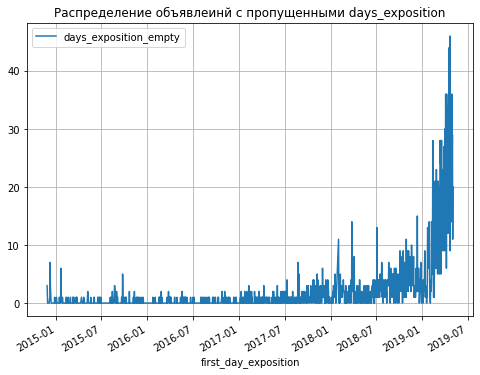

In [14]:
# приводим first_day_exposition к типу даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
# создаем новый столбец days_exposition_empty, определяющий пропущено ли количество дней объявления или нет
data['days_exposition_empty'] = data['days_exposition'].isna().astype(int)

(data
 .groupby('first_day_exposition')
 .agg({'days_exposition_empty': 'sum'})
 .plot(title='Распределение объявлеинй с пропущенными days_exposition', figsize=(8,6), grid=True)
)

На графике видно, что количество пропусков стремительно растет с начала 2019 года. Похоже, что данные пропущенны не просто так, а потому что на момент выгрузки эти объявления были все еще открыты.

Пропущенные значения в столбце `days_exposition` заполнять не нужно, оставим их в таком виде.

**Вывод**

В ходе обработки пропусков таблицы использовались различные методы.

Строки с пропущенными значениями в `floors_total` и `locality_name` были удалены, так как они составляют 0,5% выборки и не повлияют на исследование.

Для студий (строк в которых значение `studio == True`) приравняли пустые значения площади кухни `kitchen_area` к нулю, а `living_area` к `total_area`. Остальные пропущенные значения `kitchen_area` и `living_area` заполнены медианными значениями групп по количеству комнат `rooms`, так как это ключевой параметр, влияющий на площадь.

Пропуски в высоте потолков `ceiling_height` и столбцах с дистанций `parks_nearest`, `ponds_nearest`, `airports_nearest` и `city_centers_nearest` заменены на медианные значения по всей таблице. Медианное значение в данных случаях позволит работать с данными и не исказит результаты исследований.

Пропуски в `is_apartment` заменены на `False`, в `balcony` на 0, так как эти значения логично принимать, когда они отсутвуют.

Пропущенные значения в столбце `days_exposition` оставлены в текущем виде. Так как мы убедились, построив график зависимости, что количество пропусков увеличивается ближе к дате выгрузки данных, то есть объявления еще активны.

Вызовем еще раз метод `info()`, чтобы убедиться в том, что все пропуски были обработаны.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           23565 non-null  int64         
 1   last_price             23565 non-null  float64       
 2   total_area             23565 non-null  float64       
 3   first_day_exposition   23565 non-null  datetime64[ns]
 4   rooms                  23565 non-null  int64         
 5   ceiling_height         23565 non-null  float64       
 6   floors_total           23565 non-null  float64       
 7   living_area            23565 non-null  float64       
 8   floor                  23565 non-null  int64         
 9   is_apartment           23565 non-null  bool          
 10  studio                 23565 non-null  bool          
 11  open_plan              23565 non-null  bool          
 12  kitchen_area           23565 non-null  float64       
 13  b

### Изменение типов данных

Посмотрим на типы данных таблицы.

In [16]:
data.dtypes

total_images                      int64
last_price                      float64
total_area                      float64
first_day_exposition     datetime64[ns]
rooms                             int64
ceiling_height                  float64
floors_total                    float64
living_area                     float64
floor                             int64
is_apartment                       bool
studio                             bool
open_plan                          bool
kitchen_area                    float64
balcony                         float64
locality_name                    object
airports_nearest                float64
city_centers_nearest            float64
parks_around3000                float64
parks_nearest                   float64
ponds_around3000                float64
ponds_nearest                   float64
days_exposition                 float64
days_exposition_empty             int64
dtype: object

Столбец `first_day_exposition` уже был приведен к типу даты в пукте <a href='#Обработка-пропусков'>Обработка пропусков</a> с помошью строки:

`data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])`

Но еще осталисть столбцы, у которых нужно изменить вещественный тип данных на целый:
* `last_price` — цена
* `floors_total` — количество этажей в доме
* `balcony` — количество балконов
* `parks_around3000` — число парков в радиусе 3 км
* `ponds_around3000` — число водоёмов в радиусе 3 км


Приведем их к целочисленному типу данных с помощью метода `astype()`. Столбец `days_exposition` не будем приводить, так как там остались пропуски.

In [17]:
columns = ['last_price', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']
# обработка возможных ошибок с помощью try-except
try:
    data[columns] = data[columns].astype('int')
except:
    print('При изменении типа данных произошла ошибка')

Рассмотрим значения переменной `locality_name` типа `object`.

In [18]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Создадим список с наименованиями, которые нужно удалить из названий (например "городской поселок", "посёлок городского типа"). Удалим их из значений столбца `locality_name` с помощью метода `str.replace()`.

In [19]:
for item in ['садоводческое некоммерческое товарищество ', 'городской посёлок ','городской поселок ', 'коттеджный посёлок ', 
             'коттеджный поселок ', 'деревня ','поселок городского типа ', 'садовое товарищество ', 'поселок станции ',
             'посёлок станции ', 'посёлок городского типа имени ', 'поселок городского типа имени',
             'посёлок городского типа ', 'посёлок при железнодорожной станции ', 'посёлок ', 'поселок ', 'село ']:
    data['locality_name'] = data['locality_name'].str.replace(item, '')

Еще раз посмотрим на уникальные значения, чтобы убедиться в том, что все заменили.

In [20]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

### Проверка дубликатов

Посчитаем количество дубликатов в таблице:

In [21]:
data.duplicated().sum()

0

Дубликатов в таблице нет.

**Вывод**

Параметр `first_day_exposition` приведен к типу даты, столбцы `last_price`, `floors_total`, `balcony`, `parks_around3000` и `ponds_around3000` приведены к целочисленному типу данных.

Убедимся в этом с помошью метода `dtypes`:

In [22]:
data.dtypes

total_images                      int64
last_price                        int64
total_area                      float64
first_day_exposition     datetime64[ns]
rooms                             int64
ceiling_height                  float64
floors_total                      int64
living_area                     float64
floor                             int64
is_apartment                       bool
studio                             bool
open_plan                          bool
kitchen_area                    float64
balcony                           int64
locality_name                    object
airports_nearest                float64
city_centers_nearest            float64
parks_around3000                  int64
parks_nearest                   float64
ponds_around3000                  int64
ponds_nearest                   float64
days_exposition                 float64
days_exposition_empty             int64
dtype: object

Также из значений столбца `locality_name` с типом данных `object` удалены лишние наименования названй населенных пунтов. 
Дубликатов в таблице нет. 

Предобработка данных завершена. Данные подготовленны к дальнейшей работе 👌

## Расчёты и добавление результатов в таблицу

Добавим в таблицу столбец с ценой квадратного метра `price_per_meter`.

In [23]:
data['price_per_meter'] = (data['last_price'] / data['total_area']).astype('int')

Добавим в таблицу столбцы день недели, месяц и год публикации объявления, полученные из столбца `first_day_exposition`.

In [24]:
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

Для добавления столбца с этажем квартиры `floor_category` напишем функцию, которая возвращает одно из трех значений: первый, последний, другой.

In [25]:
# функция
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'


# применение функции к строкам
data['floor_category'] = data.apply(floor_category, axis=1)

Также вычислим соотношение жилой и общей площади, отношение площади кухни к общей. Вычеслим значения с точностью до 2 знаков после запятой.

Создадим столбцы для этих значений `living_to_total_area` и `kitchen_to_total_area` соответственно.

In [26]:
data['living_to_total_area'] = (data['living_area'] / data['total_area']).round(2)
data['kitchen_to_total_area'] = (data['kitchen_area'] / data['total_area']).round(2)

Выведем первые 5 строк таблицы, чтобы посмотреть добавленные столбцы.

In [27]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,days_exposition_empty,price_per_meter,weekday,month,year,floor_category,living_to_total_area,kitchen_to_total_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,NaN,1,120370,3,3,2019,другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,503.0,81.0,0,82920,1,12,2018,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,574.0,558.0,0,92785,3,8,2015,другой,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,234.0,424.0,0,408176,4,7,2015,другой,0.28,0.06
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,0,100000,1,6,2018,другой,0.32,0.41


**Вывод**

Теперь в таблице 30 столбцов, расчитаны и добавленны следующие:
* `price_per_meter` - цена квадратного метра
* `weekday` - день недели публикации объявления
* `month` - месяц публикации объявления
* `year` - год публикации объявления
* `floor_category` - этаж квартиры (первый, последний, другой)
* `living_to_total_area` - отношение жилой площади к общей
* `kitchen_to_total_area` - отношение площади кухни к общей

## Исследовательский анализ данных

### Исследование площади, цены, числа комнат, высоты потолков

Изучим следующие параметры: площадь, цена, число комнат, высота потолков.

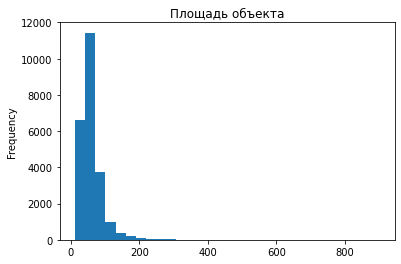

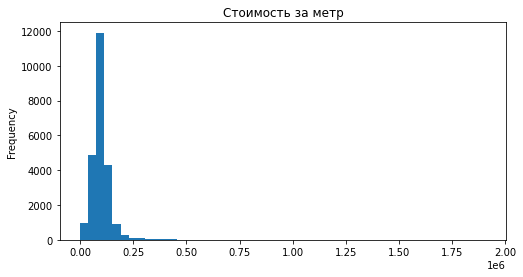

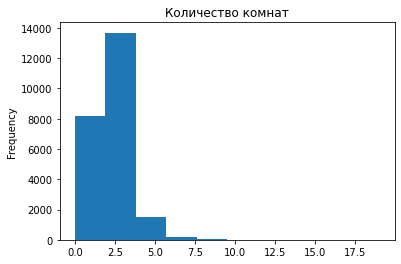

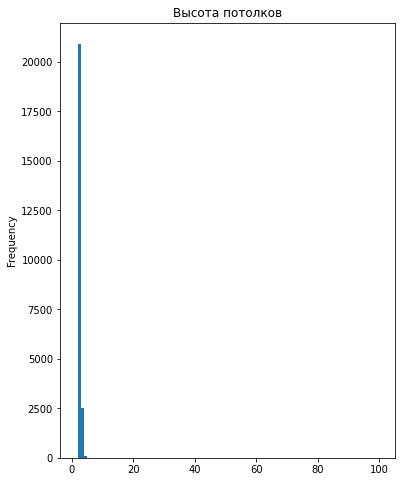

In [28]:
# гистограмма для total_area
data['total_area'].plot(kind='hist', bins=30, title='Площадь объекта')
plt.show()
# гистограмма для price_per_meter
data['price_per_meter'].plot(kind='hist', bins=50, figsize=(8,4), title='Cтоимость за метр')
plt.show()
# гистограмма для rooms
data['rooms'].plot(kind='hist', bins=10, title='Количество комнат')
plt.show()
# гистограмма для ceiling_height
data['ceiling_height'].plot(kind='hist', bins=100, figsize=(6,8), title='Высота потолков')
plt.show()

Для вывода гистограм использовали разный размер и количество корзин, чтобы графики выглядели нагляднее. Все гистограммы похожи на распределение Пуассона.

Площадь `total_area` имеет пик у 60м², почти все значения лежат в пределах 200м².

Значения цены `last_price` почему-то имеют пик у 0 и длинный хвост больших значений. Нужно проверить выбросы.

График `rooms` с распеределнием количества комнат показывает, что большинство кварир с 2-3 комнатами, почти все квартиры имеют меньше 7 комнат.

Подавляющее большинство значений высоты потолков `ceiling_height` лежит в пределах 5 метров, значения имеют длинный хвост больших значений. Нужно проверить выбросы.

### Исследование количества времени для продажи квартиры

Изучим время продажи квартир, столбец `days_exposition`.

Построим гистограмму `days_exposition`, выведем числовое описание данных методом `describe()`. 

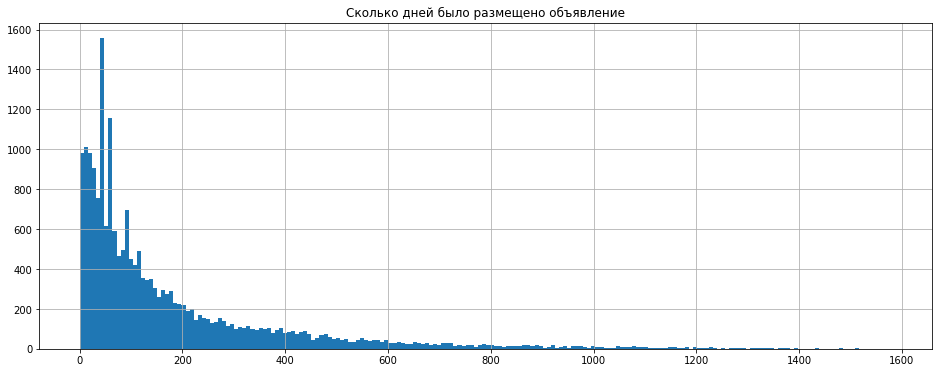

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [29]:
data.hist(column='days_exposition', bins=200, figsize=(16,6))
plt.title('Cколько дней было размещено объявление')
plt.show()
data['days_exposition'].describe()

Судя по данным продажа обычно занимает 95 дней. При этом среднее значение 180 дней, что означает наличие объявлений с очень большим сроком размещения, самое длинное - 1580 дней.

При этом есть очень выделяющиеся пики значений, возможно это автоматические закрытия объявлений или другие причины, вызвавшие аномалию.

### Анализ редких и выбивающихся значений

Чтобы исключить редкие и выбивающиеся значения, построим диаграммы размаха `boxplot` (ящик с усами) для столбцов, которые мы исследовали: 
* `total_area`,
* `price_per_meter`,
* `rooms`,
* `ceiling_height`,
* `days_exposition`.

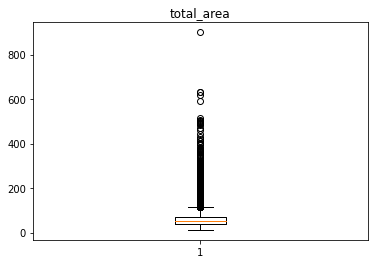

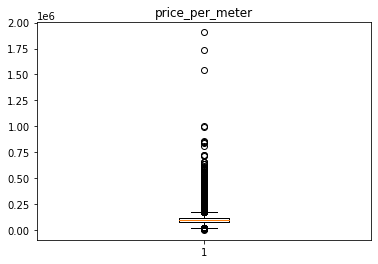

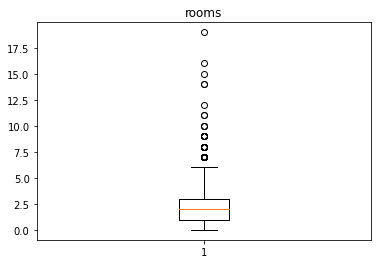

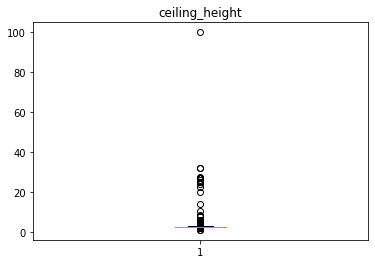

In [30]:
for column in ['total_area', 'price_per_meter', 'rooms', 'ceiling_height']:
    plt.boxplot(data[column])
    plt.title(column)
    plt.show()

Для того, чтобы узнать точные значения границ верхних и нижних усов, используем `IQR` — число, которое показывает разброс средней половины. 

`IQR` — это разница между `Q3` и `Q1`. Тогда редкие значения будут меньше `Q1 - 1.5 * IQR`, а выбивающиеся значения больше `Q3 + 1.5 * IQR`.

In [31]:
for column in ['total_area', 'price_per_meter', 'rooms', 'ceiling_height', 'days_exposition']:
    # расчет IQR
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    # границы интервала наиболее вероятных значений
    lower_border = q1 - 1.5 * iqr
    upper_border = q3 + 1.5 * iqr
    # название значения
    print(column)
    # вывод границ выбросов
    print(f'Границы выбросов: {lower_border}, {upper_border}\n')

total_area
Границы выбросов: -4.550000000000004, 114.25

price_per_meter
Границы выбросов: 20095.5, 170683.5

rooms
Границы выбросов: -2.0, 6.0

ceiling_height
Границы выбросов: 2.45, 2.8500000000000005

days_exposition
Границы выбросов: -234.0, 510.0



Посчитаем сколько процентов мы удалим при отсечении выбросов по каждому паарметру:

In [32]:
print(f'total_area: {1 - len(data.query("total_area <= 114.25"))/len(data):.2%}\n')
print(f'price_per_meter: {1 - len(data.query("20095.5 <= price_per_meter <= 170683.5"))/len(data):.2%}\n')
print(f'rooms: {1 - len(data.query("rooms <= 6"))/len(data):.2%}\n')
print(f'ceiling_height: {1 - len(data.query("2.45 <= ceiling_height <= 2.85"))/len(data):.2%}\n')
# также сохраним пустые значения days_exposition
print(f'days_exposition: {1 - len(data.query("days_exposition <= 510 or days_exposition.isna()"))/len(data):.2%}')

total_area: 5.26%

price_per_meter: 4.62%

rooms: 0.38%

ceiling_height: 12.51%

days_exposition: 7.07%


Получается, что много выбросов в параметрах выоты потолков 13%, оставльные меньше 7%.

Создадим новую таблицу `new data`. В ней будут данные отфильтрованные без выбросов.

In [33]:
new_data = data[(data['total_area'] <= 114.25) & 
                ((data['price_per_meter'] <= 170683.5) | (data['price_per_meter'] >= 20095.5)) &
                (data['rooms'] <= 6) &
                ((data['ceiling_height'] <= 2.85) | (data['ceiling_height'] >= 2.45)) &
                ((data['days_exposition'] <= 510) | (data['days_exposition'].isna()))              
               ]

# посчитаем размер новой выборки
print(f'Размер выборки: {len(new_data) / len(data):.0%}')

Размер выборки: 88%


Выборка без редких и выбивающихся значений составляет 88% от исходных данных Но это чистые данные с которыми уже можно работать. 

Посмотрим на результаты метода `describe()` для начальных данных и новой выборки, чтобы посмотреть не изменились ли значимо средние значения и квартили.

In [34]:
for column in columns:
    print(column)
    # колонка before
    before = data[[column]].describe().round(2).rename(columns = {column: 'before'})
    # колонка after
    after = new_data[[column]].describe().round(2).rename(columns = {column: 'after'})
    # соединение колонок методом join
    display(before.join(after))

last_price


,before,after
count,2.356500e+04,20836.00
mean,6.540058e+06,5254197.07
std,1.091093e+07,3297425.86
min,1.219000e+04,12190.00
25%,3.400000e+06,3350000.00
50%,4.646000e+06,4500000.00
75%,6.790000e+06,6225000.00
max,7.630000e+08,53000000.00


floors_total


,before,after
count,23565.00,20836.00
mean,10.68,10.82
std,6.59,6.64
min,1.00,1.00
25%,5.00,5.00
50%,9.00,9.00
75%,16.00,16.00
max,60.00,60.00


balcony


,before,after
count,23565.00,20836.00
mean,0.59,0.60
std,0.96,0.96
min,0.00,0.00
25%,0.00,0.00
50%,0.00,0.00
75%,1.00,1.00
max,5.00,5.00


parks_around3000


,before,after
count,23565.00,20836.00
mean,0.47,0.43
std,0.75,0.72
min,0.00,0.00
25%,0.00,0.00
50%,0.00,0.00
75%,1.00,1.00
max,3.00,3.00


ponds_around3000


,before,after
count,23565.00,20836.00
mean,0.59,0.55
std,0.88,0.85
min,0.00,0.00
25%,0.00,0.00
50%,0.00,0.00
75%,1.00,1.00
max,3.00,3.00


### Исследование факторов, влияющих на стоимость квартиры

Изучим зависит ли цена недвижимости за метр `price_per_meter` от следующийх факторов:
* площади `total_area`,
* числа комнат `rooms`,
* удалённости от центра `city_centers_nearest`,
* на каком этаже расположена квартира: первом, последнем или другом `floor_category`,
* зависимость от даты размещения: дня недели, месяца и года `weekday`, `month`, `year`.

Для начала посморим на коэффициенты Пирсона, получим их с помощью метода `corr()`.

In [35]:
new_data[['price_per_meter', 'total_area','rooms', 'city_centers_nearest', 'weekday', 'month', 'year']].corr()

,price_per_meter,total_area,rooms,city_centers_nearest,weekday,month,year
price_per_meter,1.000000,0.110333,-0.110335,-0.243076,-0.012910,-0.010291,0.067613
total_area,0.110333,1.000000,0.788125,-0.141471,-0.012198,0.004853,-0.031846
rooms,-0.110335,0.788125,1.000000,-0.077715,-0.001610,-0.003157,-0.016139
city_centers_nearest,-0.243076,-0.141471,-0.077715,1.000000,0.006992,-0.010965,-0.003287
weekday,-0.012910,-0.012198,-0.001610,0.006992,1.000000,0.014680,-0.010724
month,-0.010291,0.004853,-0.003157,-0.010965,0.014680,1.000000,-0.302062
year,0.067613,-0.031846,-0.016139,-0.003287,-0.010724,-0.302062,1.000000


Коэффиценты корреляции цены с другими параметрами по модулю ниже 0.2, что означает отсутвие линыйных зависимостей.


Построим диаграммы расеивания для всех столбцов с помощью `scatter_matrix`.

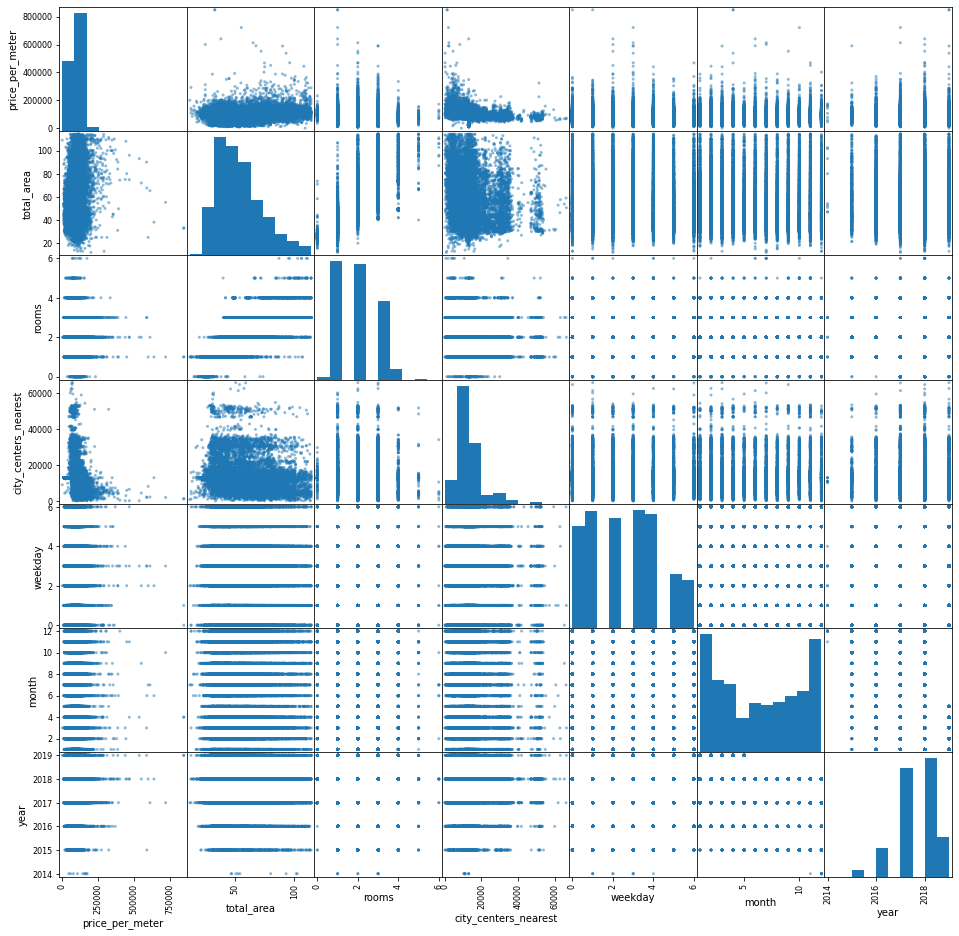

In [36]:
pd.plotting.scatter_matrix(new_data[['price_per_meter', 'total_area','rooms', 'city_centers_nearest',
                                     'floor_category', 'weekday', 'month', 'year']], figsize=(16,16))

plt.show()

На графиках видно, что зависимости от дня недели, месяца или года нет, на диаграммах рассеивания вертикальные линии примерно одинаковы у каждого значения. Рассмотрим ближе диаграмму с количеством комнат.

<AxesSubplot:title={'center':'Количество комнат'}, xlabel='rooms', ylabel='price_per_meter'>

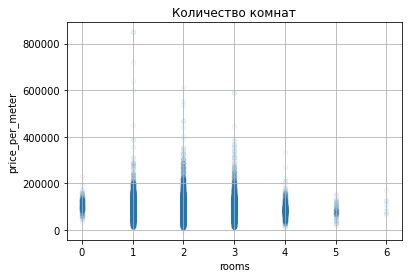

In [37]:
new_data.plot(x='rooms', y='price_per_meter', kind='scatter', grid=True, alpha=0.05, title='Количество комнат')

Прямой зависимости от количесвта комнат с ценой нет, стоимость за метр бывает и низкая и высокая. Но видно, что предложений студий и квартир больше 4 комнат становится гораздо меньше.

Построим графики hexbin для просмотра зависимостей цены за метр от площади квартиры и расстояния до центра.

<AxesSubplot:title={'center':'Площадь от цены за метр'}, xlabel='total_area', ylabel='price_per_meter'>

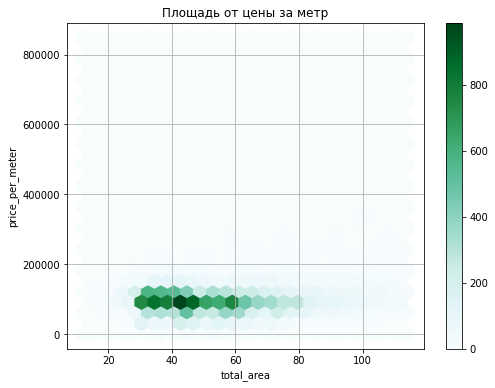

In [38]:
new_data.plot(x='total_area', y='price_per_meter',
              kind='hexbin', gridsize=25, figsize=(8, 6), sharex=False, grid=True, title='Площадь от цены за метр') 

<AxesSubplot:title={'center':'Расстояние от центра от цены за метр'}, xlabel='city_centers_nearest', ylabel='price_per_meter'>

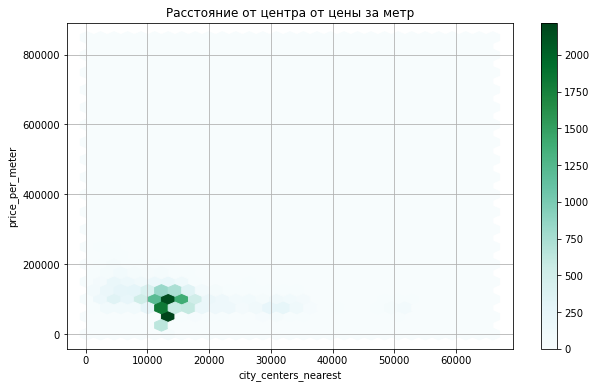

In [39]:
new_data.plot(x='city_centers_nearest', y='price_per_meter', kind='hexbin', gridsize=30, 
              figsize=(10, 6), sharex=False, grid=True, title='Расстояние от центра от цены за метр') 

На диаграмме с площаью `total_area` есть уплотнения при 30 кв.м. и цене 100 т.р., также у 45 кв.м. и стоимости 80-100 т.р. Присутсвует закономерность, у квартир площадью 30-50 кв.м. цена за метр почти одинакова.

На диаграмме с расстоянием до центра `city_centers_nearest` цветом выделена вертикальная часть 11-14 км от центра. На этом расстоянии квартиры стоят определенные суммы, от 20 до 120 т.р.

Скорее всего это частые рыночные цены.

Чтобы посмотреть на зависимость цены от этажа `floor_category` (первый, последний, другой), создадим сводную таблицу и выведем средние параметры.

In [40]:
pd.pivot_table(new_data, columns='floor_category', values='price_per_meter', aggfunc='mean')

floor_category,другой,первый,последний
price_per_meter,100092.828198,80534.944743,86980.050246


Дешевле всего квартиры на первом этаже, самы дорогие - другие.

### Анализ десяти населённых пунктов с наибольшим числом объявлений

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

Выделим 10 населенных пунктов с наибольшим числом объявлений с помощью `value_counts()`:

In [41]:
new_data['locality_name'].value_counts().head(10)

Санкт-Петербург    13513
Мурино               553
Кудрово              435
Шушары               416
Всеволожск           364
Колпино              322
Пушкин               321
Парголово            312
Гатчина              280
Выборг               214
Name: locality_name, dtype: int64

Самое большое количество объявлений в Санкт-Петербурге, закрывает топ-10 Выборг.

Посчитем среднюю цену квадратного метра в этих населённых пунктах, выведем таблицу с результатом по убыванию средней цены.

In [42]:
top_10_list = new_data['locality_name'].value_counts().head(10).index
# создание сводной таблицы с функциями count и mean
top_10 = new_data[new_data['locality_name'].isin(top_10_list)].pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count', 'mean'])
# переименование столбцов
top_10.columns = ['count', 'mean_price']
# вывод по убыванию mean_price
top_10.sort_values(by='mean_price', ascending=False)

,count,mean_price
locality_name,,
Санкт-Петербург,13513,110566.649301
Пушкин,321,101814.074766
Кудрово,435,95439.558621
Парголово,312,90053.118590
Мурино,553,86264.164557
Шушары,416,78515.713942
Колпино,322,75284.993789
Гатчина,280,69123.221429
Всеволожск,364,68711.489011


### Анализ изменения цены по степени удалённости от центра

Выделим квартиры в Санкт-Петербурге. Создадим столбец с расстоянием до центра в километрах, найдем среднюю стоимость за метр для каждого киллометра.

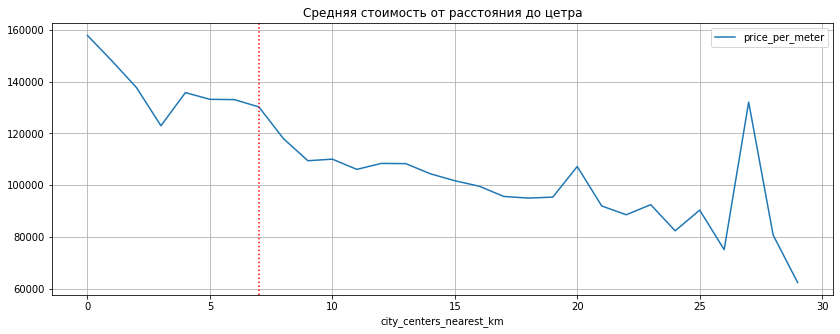

In [43]:
# фильтрация объявлений по Санкт-Перербургу
spb = new_data.query('locality_name == "Санкт-Петербург"')
# создаем столбец удаленности от центра в км
spb['city_centers_nearest_km'] = (spb['city_centers_nearest'] / 1000).astype('int')

# сводная таблица со средней ценой
spb_final = spb.pivot_table(index='city_centers_nearest_km', values='price_per_meter', aggfunc='mean')
#display(spb_final)

# построение графика
spb_final.plot(grid=True, figsize=(14,5), title='Средняя стоимость от расстояния до цетра')
# линия изменения графика, центра города
plt.axvline(x = 7, color = 'red', linestyle=':')
plt.show()

Как видно на графике, примерно в 7 километрах цена квартир за квадратный метр начинает падать. То есть квартиры в радиусе 7км от центра стоят дороже, так как находятся в центре Санкт-Петербурга.

### Сравнение выводов по квартирам в центре и общих выводов по всему городу

Сравним результаты для квартир в центре и всех квартир Санкт-Петербурга.

Для сравнения построим диаграммы для слудющих параметров:
* площадь `total_area`
* цена `price_per_meter`
* число комнат `rooms`
* высота потолков `ceiling_height`
* дата размещения объявления `first_day_exposition` 
* удалённость от центра `city_centers_nearest`

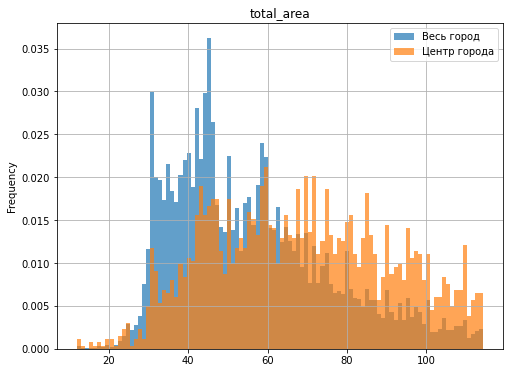

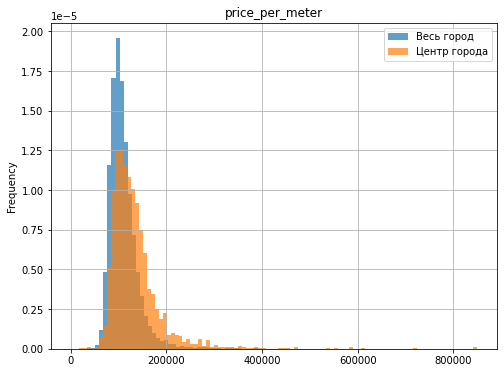

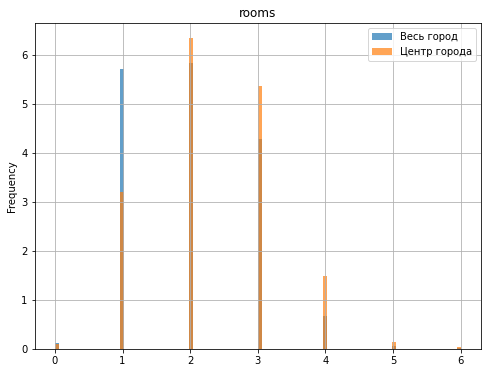

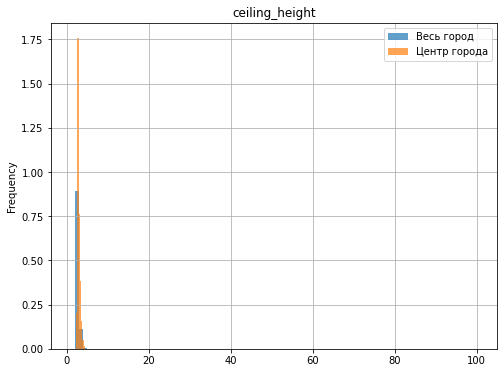

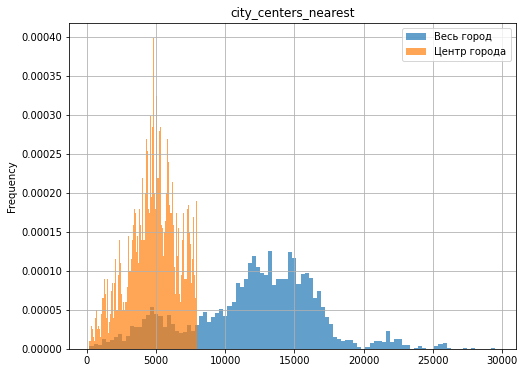

In [44]:
# квартрры в центре
spb_center = spb.query('city_centers_nearest_km <= 7')

for column in ['total_area', 'price_per_meter', 'rooms', 'ceiling_height', 'city_centers_nearest']:
    spb[column].plot(kind='hist', bins=100, grid=True, density=True, label="Весь город", alpha=0.7)
    spb_center[column].plot(kind='hist', bins=100, grid=True, density=True, label="Центр города", alpha=0.7, figsize=(8,6))
    plt.title(column)
    plt.legend(loc="upper right")
    plt.show()

Text(0.5, 1.0, 'Дата размещения объявления')

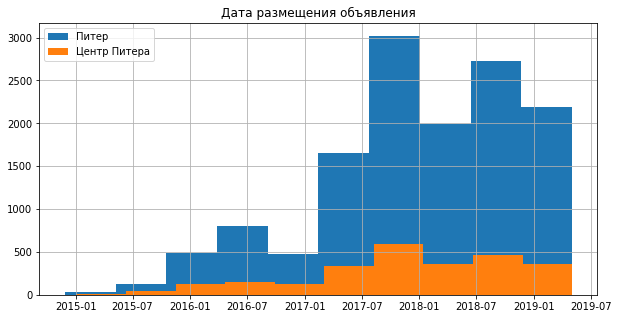

In [45]:
#день публикации
spb['first_day_exposition'].hist(label='Питер')
spb_center['first_day_exposition'].hist(figsize=(10,5), label='Центр Питера')
plt.legend()
plt.title('Дата размещения объявления')

Оранжевым отображаются данные по цетру (в радиусе 7 км), а синим по всему городу.

Исходя их полученных графиков:
- в центре не так много маленьких квартир (35-45 км.м), чуть больше квартир большой площадью по сравнению со всем городом,
- график цен за метр в центре очень похож на общий, только сдвинут врпаво, то есть чены дороже,
- не так много однокомнатных квартир, остальное схоже,
- высота потолков одинакова
- пики по размещению объявлений совпадают, но объявленй в центре очень малое количество,
- график расстояния до центра различен, что по сути очевидно, но мы наглядно в этом убедились.

Также необходимо сравнить корреляцию данных параметров во всем городе и в центре. Воспользуемся поочередно методом `corr()`.

In [46]:
spb[['total_area', 'price_per_meter', 'rooms', 'ceiling_height', 'city_centers_nearest']].corr()

,total_area,price_per_meter,rooms,ceiling_height,city_centers_nearest
total_area,1.000000,0.086791,0.774121,0.049648,-0.256429
price_per_meter,0.086791,1.000000,-0.154177,0.136510,-0.339504
rooms,0.774121,-0.154177,1.000000,0.014637,-0.173549
ceiling_height,0.049648,0.136510,0.014637,1.000000,-0.084635
city_centers_nearest,-0.256429,-0.339504,-0.173549,-0.084635,1.000000


In [47]:
spb_center[['total_area', 'price_per_meter', 'rooms', 'ceiling_height', 'city_centers_nearest']].corr()

,total_area,price_per_meter,rooms,ceiling_height,city_centers_nearest
total_area,1.000000,-0.026930,0.743406,0.081812,-0.163786
price_per_meter,-0.026930,1.000000,-0.220938,0.025014,-0.052510
rooms,0.743406,-0.220938,1.000000,0.034760,-0.150616
ceiling_height,0.081812,0.025014,0.034760,1.000000,-0.135469
city_centers_nearest,-0.163786,-0.052510,-0.150616,-0.135469,1.000000


Корреляция стоимости с остальными параметрами:
1. Площадь: корееляция в ценре более отрицательна, но все еще незначительна
2. Количество комнат: в центре чуть более отрицательна, чем во всем городе, эта корреляция небольшая (при большем количесвтве комнат стоимость за метр уменьшается)
3. Высота потолков: в центре города корреляция гораздо меньше, то есть цена не зависит от высоты потолков
4. Расстояние до центра: во всем городе корреляция отрицательна, в центре положительна, что логично.

**Вывод**

В ходе исследовательского анализа данных было решено множество задач:
* исследованны площади, цены, числа комнат, высоты потолков, количество времени;
* проанализированны редкие и выбивающиеся значения, они не были вкючены в выборку для дальнейшей работы;
* исследованны факторы, влияющих на стоимость квартиры - это площадь и расстояние до центра;
* выделены 10 населённых пунктов с наибольшим числом объявлений, посчитана средняя цена квадратного метра в этих населённых пунктах;
* по убыванию цены в зависимости от удаленности от центра выделенн центр Санкт-Петербурга;
* проведено сравнение основных параметров, влияющих на ценобразование, в центре и всем городе.

## Общий вывод

В ходе данного проекта были изучены данные об объявлениях с Яндекс.Недвижимости, был произведен расчет и добавление дополнительних значений, проведено масштабное исследование по параметрам, которые влияют на цену недвижимости, которое влючало в себя удаление выбросов, построение графиков, создание сводных таблиц и т.д.